## 1. Basic Gradient Descent


C:\Users\junho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:32: RuntimeWarning: invalid value encountered in double_scalars
  reg_term=np.linalg.norm(theta)*l2_reg
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:41: RuntimeWarning: invalid value encountered in multiply
  reg_term=2*l2_reg*theta


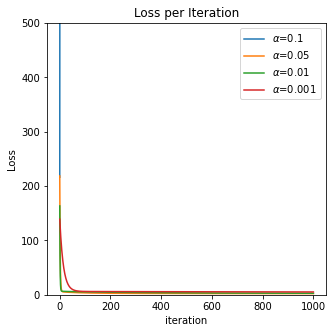

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from gradient import *
import pandas
import csv
## Data Generation

df=pandas.read_csv("data.csv") ## Jupiter Notebook이라 간단하게 표현가능, 실제로는 경로를 더 자세하게 표시해줘야함.
y=df['y']
X=df.loc[:,df.columns!='y']
## 데이터 불러오기
X_train,X_test,y_train,y_test=splitData(X,y)
## 성능 평가를 위해 test set 과 train set을 분리.
X_train,X_test=featurescale(X_train,X_test)
## (Min-Max feature scale)
theta_init=np.random.rand(X_train.shape[1]) 
loss=SquareLossfunction(X_train,y_train,theta_init)
num_iter=1000
alpha_samples=[0.1,0.05,0.01,0.001]
plt.figure(figsize=(5, 5))
index=np.arange(0,num_iter+1,1)
for alpha in alpha_samples:
    g_theta_hist,g_loss_hist, _ =gradDescent(X_train,y_train,alpha=alpha,num_iter=num_iter,backtracking=False)
    plt.plot(index,g_loss_hist,label=r"$\alpha$={}".format(alpha))
plt.title("Loss per Iteration")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.ylim(0,500)
plt.legend()

## 2. Gradient descent with Backtracking vs Basic Gradient Descent 

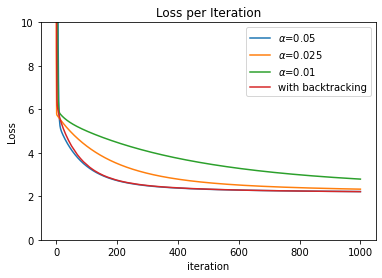

In [4]:
index=np.arange(0,num_iter+1,1)
alpha_samples=[0.05,0.025,0.01]
for alpha in alpha_samples:
    g_theta_hist,g_loss_hist, _ =gradDescent(X_train,y_train,alpha=alpha,num_iter=num_iter,backtracking=False)
    plt.plot(index,g_loss_hist,label=r"$\alpha$={}".format(alpha))
b_theta_hist,b_loss_hist,backtracknum=gradDescent(X_train,y_train,num_iter=num_iter,backtracking=True)
plt.plot(index,b_loss_hist,label=r"with backtracking" )
plt.title("Loss per Iteration")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.ylim(0,10)
plt.legend()

C:\Users\junho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:32: RuntimeWarning: invalid value encountered in double_scalars
  reg_term=np.linalg.norm(theta)*l2_reg
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:40: RuntimeWarning: overflow encountered in multiply
  grad_term=(2.0/m)*(np.dot(X.T,temp))
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:41: RuntimeWarning: invalid value encountered in multiply
  reg_term=2*l2_reg*theta


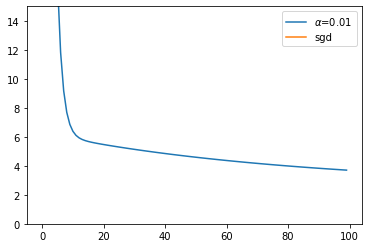

In [52]:
g_theta_hist,g_loss_hist,_ =gradDescent(X_train,y_train,alpha=0.05,num_iter=100,backtracking=False)

batchsize=[10,25,50]
plt.ylim(0,15)
index=np.arange(0,100,1)

plt.plot(index,g_loss_hist[0:100],label=r"$\alpha$={}".format(0.01))
b_loss_hist,b_theta_hist= minibatchgradDescent(X_train,y_train,batchsize=1,alpha=0.05,num_iter=100) ##setting batchsize=1-> SGD
plt.plot(index,np.mean(b_loss_hist,axis=1),label=r"sgd")
plt.legend()

## 3. Stochastic(Mini-Batch) Gradient Descent vs Full Gradient Descent

No handles with labels found to put in legend.


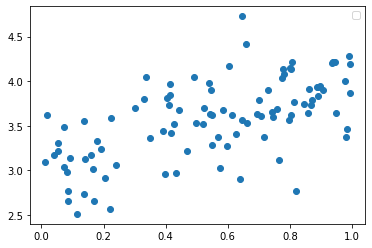

In [46]:
index=np.arange(0,100,1)
N = 100
theta = np.array([[1], [3]])
X = np.c_[np.random.rand(N,1), np.ones((N,1))]
y = np.dot(X,theta)+ 0.4*np.random.randn(N,1)
true_theta = np.linalg.lstsq(X, y, rcond=None)[0]

plt.legend()
plt.scatter(X[:,0],y)



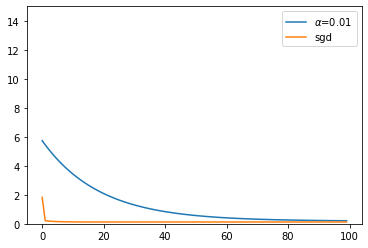

In [59]:
y=np.squeeze(y)## making y from 2d to 1d
g_theta_hist,g_loss_hist,_ =gradDescent(X,y,alpha=0.01,num_iter=100,backtracking=False)

batchsize=[10,25,50]
plt.ylim(0,15)
index=np.arange(0,100,1)

plt.plot(index,g_loss_hist[0:100],label=r"$\alpha$={}".format(0.01))
b_loss_hist,b_theta_hist= minibatchgradDescent(X,y,batchsize=1,alpha=0.01,num_iter=100) ##setting batchsize=1-> SGD
plt.plot(index,np.mean(b_loss_hist,axis=1),label=r"sgd")
plt.legend()

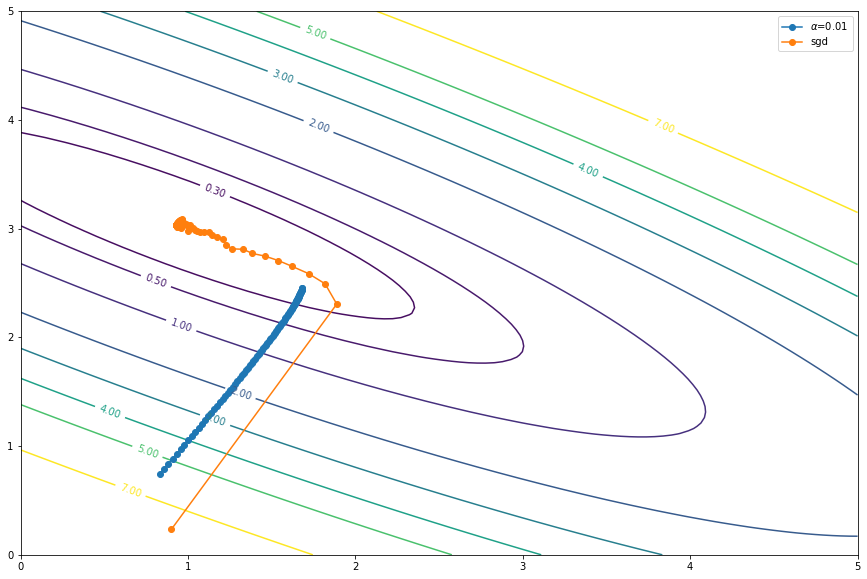

In [63]:
##Draw a Contour line
Xmesh, Ymesh=np.meshgrid(np.linspace(0,5,100),np.linspace(0,5,100))
Z=np.zeros(Xmesh.shape)
for i in range(Xmesh.shape[0]):
    for j in range(Xmesh.shape[1]):
        theta1=Xmesh[i][j]
        theta2=Ymesh[i][j]
        Z[i,j]=SquareLossfunction(X,y,np.array([theta1,theta2]))

plt.figure(figsize=(15,10))
CS = plt.contour(Xmesh, Ymesh, Z, [0.03, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(g_theta_hist[:,0],g_theta_hist[:,1],marker="o",label=r"$\alpha$={}".format(0.01))
plt.plot(b_theta_hist[:,0,0],b_theta_hist[:,0,1],marker="o",label="sgd")
plt.legend()